In [66]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Lab 10: Residuals

## References

* [Sections 15.0 - 15.6 of the Textbook](https://inferentialthinking.com/chapters/15/Prediction.html)
* [Sections 16.0 - 16.3 of the Textbook](https://inferentialthinking.com/chapters/16/Inference_for_Regression.html#)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-sp24/resources/quick-reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- Collaborating on labs is more than okay -- it's encouraged! You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) Please don't just share answers, though.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following cell to set up the lab, and make sure you run the cell at the top of the notebook that initializes Otter.

In [67]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## ✈️ San Francisco International Airport Utility Usage

<img src="sfo.webp" width=80% alt="The SFO Internation temrinal">

The San Francisco International Airport (SFO) utilizes a lot of utilities. The data in `sfo_usage.csv` includes the total monthly utility consumption for the electricity (`'electricity'`), natural gas (`'gas'`), and water (`'water'`) utilities. This data was sourced from the [SFO Airport Monthly Utility Consumption for Natural Gas, Water, and Electricity page](https://data.sfgov.org/Energy-and-Environment/SFO-Airport-Monthly-Utility-Consumption-for-Natura/gcjv-3mzf/about_data) on data.sfgov.org. The units for each utility are:

* Electricity: kWh
* Natural Gas: therms
* Water: million gallons

The `'passengers'` column contains the total number of passengers in SFO for the given month.

**Run the following cell to load the data in the table `sfo`.**

In [68]:
sfo = Table.read_table('sfo.csv')
sfo.show(3)

date,month,month_number,year,electricity,gas,water,passengers
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06


In this lab, you'll create models to predict the usage of electricity from the usage of water and evaluate the model by analyzing the residuals.

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

To start, create a scatter plot showing the relationship between electricity and water usage with the least squares regression line overlaid on the scatter plot. 

**Note:** Use the `fit_line=True` parameter for the `scatter` method.

_Check your graph with a classmate, a tutor, or the instructor since there are no auto-grader tests for this task._

In [ ]:
...
plt.title('Electricty vs. Water')
plt.show()

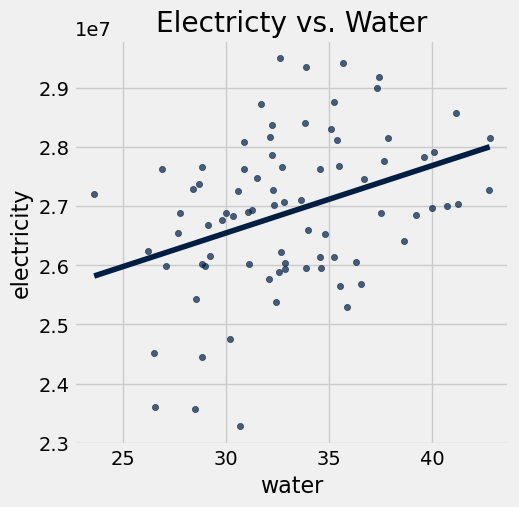

In [69]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Define a function to scatter plot with fit line
def scatter_fit(table, x, y):
    table.scatter(x, y, fit_line=True)  # Use fit_line=True to fit and plot regression line
    plt.xlabel(x)
    plt.ylabel(y)

# Use the scatter_fit function to plot electricity vs. water
scatter_fit(sfo, 'water', 'electricity')

# Show the plot
plt.title('Electricty vs. Water')
plt.show()


<!-- END QUESTION -->

### Task 02 📍

Assign an array of integers to `electricity_water` where the integers correspond to the following statements that best describe the relationship between the gas and water usage based on the scatter plot.

1. There is a positive association between the variables.
2. There is a negative association between the variables.
3. There is neither a positive association nor a negative association between the variables.
4. The association between the variables is approximately linear.
5. The association between the variables is nonlinear.

In [70]:
electricity_water = make_array(1, 5)

In [71]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ gas_water represents an array of integers.
task_02 - 2 message: ✅ Great work. That is how we interpreted this graph as well.

## Fitting Models

There is some kind of relationship between the water and electricity usage at SFO. Now, you will fit the best linear model and the best quadratic model to the data. This part of the lab is a continuation of what you were learning last week.

### Task 03 📍

A linear model has the form of `linear_predicted_electricity = slope * actual_water + intercept`. 

Create the function `linear_model_rmse` that returns the [RMSE](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#root-mean-squared-error) for a linear model fit to the electricity and water data in the `sfo` table.

The code provided below the function definition will minimize the RMSE and return the approximate slope and the approximate intercept for the least square regression line.

**Note:** Remember that we are defining error to be the actual $y$ value minus the predicted $y$ value.

In [ ]:
def linear_model_rmse(slope, intercept):
    actual_electricity = ...
    actual_water = ...
    linear_predicted_electricity = ...
    error = ...
    return ...

# The following code uses the minimize function to determine the optimal 
# slope and intercept for the linear model based on your RMSE function.
slope, intercept = minimize(linear_model_rmse)
print(f'The approximate slope and intercept of the least squares linear \
regression line fit to this data are {slope:.3f} kWh/million gallons and {intercept:.3f} kWh.')

In [72]:
def linear_model_rmse(slope, intercept):
    actual_electricity = sfo.column('electricity')  # Actual electricity usage
    actual_water = sfo.column('water')  # Actual water usage
    linear_predicted_electricity = slope * actual_water + intercept  # Predicted electricity usage
    error = actual_electricity - linear_predicted_electricity  # Calculate error (residuals)
    rmse = np.sqrt(np.mean(error ** 2))  # Calculate RMSE
    return rmse

# The following code uses the minimize function to determine the optimal 
# slope and intercept for the linear model based on your RMSE function.
slope, intercept = minimize(linear_model_rmse)
print(f'The approximate slope and intercept of the least squares linear \
regression line fit to this data are {slope:.3f} kWh/million gallons and {intercept:.3f} kWh.')


The approximate slope and intercept of the least squares linear regression line fit to this data are 113753.566 kWh/million gallons and 23136076.141 kWh.


In [73]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your function seems to be working correctly

### Task 04 📍

Using the `slope` and `intercept` values calculated in the previous task, create a function called `linear_predict_electricity`. The function should return the predicted electricity usage for the provided water usage.

In [78]:
def linear_predict_electricity(water_usage):
    slope = 113753.566
    intercept = 23136076.141  
    predicted_electricity = slope * water_usage + intercept
    return predicted_electricity

# Apply the function to the data and the predicted values to the table
sfo = sfo.with_column('linear_electricity', 
                      sfo.apply(linear_predict_electricity, 'water'))

sfo.show(3)

date,month,month_number,year,electricity,gas,water,passengers,linear_electricity
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07


In [79]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ linear_predict_electricity seems to be working correctly.

### Task 05 📍

Next, fit the best quadratic model to the data. (As a reminder, "best" for us in this context means the quadratic model that has the lowest RMSE.) A quadratic model has the form `quadratic_predicted_electricity = a * actual_water ** 2 + b * actual_water + c`.

For this task, we've provided you with the template that mirrors the steps for the linear model. You just need to fill in the details.

In [80]:
from scipy.optimize import minimize

def quadratic_model_rmse(params):
    a, b, c = params
    actual_electricity = sfo.column('electricity')
    actual_water = sfo.column('water')
    quadratic_predicted_electricity = a * actual_water ** 2 + b * actual_water + c
    error = actual_electricity - quadratic_predicted_electricity
    rmse = np.sqrt(np.mean(error ** 2))
    return rmse
    
initial_guess = [0, 0, 0]
result = minimize(quadratic_model_rmse, initial_guess)
a, b, c = result.x

def quadratic_predict_electricity(water_usage):
    predicted_electricity = a * water_usage ** 2 + b * water_usage + c
    return predicted_electricity

# Apply the function to the data and the predicted values to the table
sfo = sfo.with_column('quadratic_electricity', 
                      sfo.apply(quadratic_predict_electricity, 'water'))

sfo

date,month,month_number,year,electricity,gas,water,passengers,linear_electricity,quadratic_electricity
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07,2.68492e+07
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07,2.62343e+07
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07,2.62353e+07
2013-04-01,Apr,4,2013,2.70255e+07,313840,32.3031,3.60954e+06,2.68107e+07,2.7114e+07
2013-05-01,May,5,2013,2.81716e+07,308500,32.1146,3.9349e+06,2.67892e+07,2.70787e+07
2013-06-01,Jun,6,2013,2.76321e+07,268765,34.5307,4.15515e+06,2.70641e+07,2.74224e+07
2013-07-01,Jul,7,2013,2.87237e+07,279592,31.7107,4.18112e+06,2.67433e+07,2.69982e+07
2013-08-01,Aug,8,2013,2.91834e+07,269948,37.4292,4.3511e+06,2.73938e+07,2.75234e+07
2013-09-01,Sep,9,2013,2.81579e+07,242525,37.8765,3.78548e+06,2.74447e+07,2.75087e+07
2013-10-01,Oct,10,2013,2.83721e+07,309631,32.2261,3.92644e+06,2.68019e+07,2.70997e+07


In [82]:
grader.check("task_05")

task_05 results:
    task_05 - 1 message: ✅ Great work adding the 'quadratic_electricity' column to sfo.

    task_05 - 1 result:
        ✅ Test case passed

    task_05 - 2 message: ❌ Your quadratic electricity predictions do not seem to be correct. Ask for help as you try to follow similar steps for the linear model.

    task_05 - 2 result:
        ❌ Test case failed
        Trying:
            np.isclose(sum(sfo.column('quadratic_electricity')), 2152232600.1741104) and np.isclose(min(sfo.column('quadratic_electricity')), 25325122.546123043)
        Expecting:
            True
        **********************************************************************
        Line 1, in task_05 1
        Failed example:
            np.isclose(sum(sfo.column('quadratic_electricity')), 2152232600.1741104) and np.isclose(min(sfo.column('quadratic_electricity')), 25325122.546123043)
        Expected:
            True
        Got:
            False

### Task 06 📍🔎

<!-- BEGIN QUESTION -->

Run the following code cell to see the predicted electricity values overlaid with the actual data.

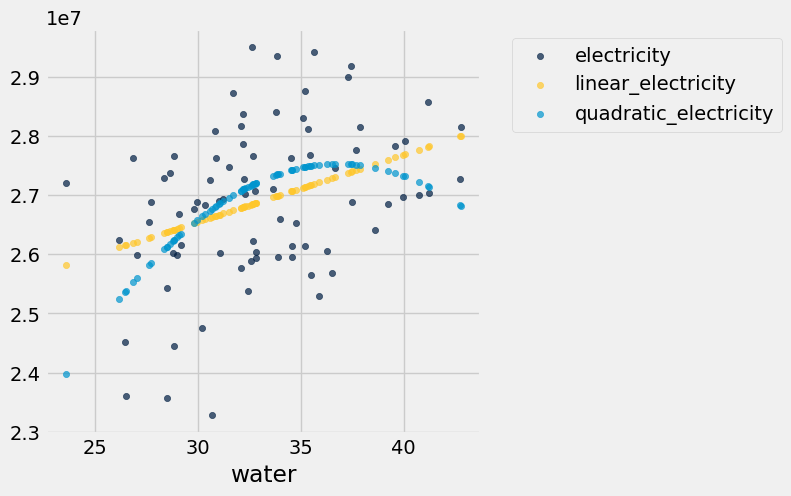

In [83]:
sfo.select('electricity', 'water', 'linear_electricity', 'quadratic_electricity').scatter('water')

Based on this graphic, do you think the linear or quadratic model fits the general trend of the data?

_Check your response with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this task._

Yes, based on the graphic, the quadratic model appears to fit the general trend of the data well.

<!-- END QUESTION -->

## Model Evaluation

Great work so far! Now we want you to use the tools you've learned in [Chapter 14](https://inferentialthinking.com/chapters/15/Prediction.html) to be able to decide between the two models. 

### Residuals

We define the residual to be the actual value minus the predicted value. (Yes, this is the same as the term error used above.) Analyzing residuals can be useful to help you decide between two (or more) models for prediction. 

#### Task 07 📍

Calculate the residuals associated with the linear and quadratic predictions. We created the function below called `residual` that returns the residual associated with the provided actual and predicted values.

We provided code to add those residuals to the table `sfo`.

In [89]:
def residual(actual, predicted):
    return actual - predicted

In [91]:
actual_electricity = sfo.column('electricity')
linear_predicted_electricity = sfo.column('linear_electricity')
linear_residuals = residual(actual_electricity, linear_predicted_electricity)

quadratic_predicted_electricity = sfo.column('quadratic_electricity')
quadratic_residuals = residual(actual_electricity, quadratic_predicted_electricity)

sfo = sfo.with_columns(
    'linear_residual', linear_residuals,
    'quadratic_residual', quadratic_residuals)

sfo

date,month,month_number,year,electricity,gas,water,passengers,linear_electricity,quadratic_electricity,linear_residual,quadratic_residual
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07,2.68492e+07,239890,57328.8
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07,2.62343e+07,-1.96794e+06,-1.78611e+06
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07,2.62353e+07,1.24761e+06,1.42882e+06
2013-04-01,Apr,4,2013,2.70255e+07,313840,32.3031,3.60954e+06,2.68107e+07,2.7114e+07,214872,-88439.7
2013-05-01,May,5,2013,2.81716e+07,308500,32.1146,3.9349e+06,2.67892e+07,2.70787e+07,1.38239e+06,1.09295e+06
2013-06-01,Jun,6,2013,2.76321e+07,268765,34.5307,4.15515e+06,2.70641e+07,2.74224e+07,568019,209660
2013-07-01,Jul,7,2013,2.87237e+07,279592,31.7107,4.18112e+06,2.67433e+07,2.69982e+07,1.98041e+06,1.72551e+06
2013-08-01,Aug,8,2013,2.91834e+07,269948,37.4292,4.3511e+06,2.73938e+07,2.75234e+07,1.78959e+06,1.66e+06
2013-09-01,Sep,9,2013,2.81579e+07,242525,37.8765,3.78548e+06,2.74447e+07,2.75087e+07,713285,649256
2013-10-01,Oct,10,2013,2.83721e+07,309631,32.2261,3.92644e+06,2.68019e+07,2.70997e+07,1.57017e+06,1.27235e+06


In [92]:
grader.check("task_07")

task_07 results:
    task_07 - 1 message: ❌ Your residuals from the linear model do not seem correct. Try applying the residual function to the sfo table and reference the linear_electricty values

    task_07 - 1 result:
        ❌ Test case failed
        Trying:
            np.isclose(np.sum(sfo.column('linear_residual')), -10.664834152907133) and np.isclose(min(sfo.column('linear_residual')), -3345482.7231732905)
        Expecting:
            True
        **********************************************************************
        Line 1, in task_07 0
        Failed example:
            np.isclose(np.sum(sfo.column('linear_residual')), -10.664834152907133) and np.isclose(min(sfo.column('linear_residual')), -3345482.7231732905)
        Expected:
            True
        Got:
            False

    task_07 - 2 message: ❌ Your residuals from the quadratic model do not seem correct. Try applying the residual function to the sfo table and reference the quadratic_electricty values.

    task_07 - 2 result:
        ❌ Test case failed
        Trying:
            np.isclose(np.sum(sfo.column('quadratic_residual')), 20128.225890103728) and np.isclose(min(sfo.column('quadratic_residual')), -3393442.3036418445)
        Expecting:
            True
        **********************************************************************
        Line 1, in task_07 1
        Failed example:
            np.isclose(np.sum(sfo.column('quadratic_residual')), 20128.225890103728) and np.isclose(min(sfo.column('quadratic_residual')), -3393442.3036418445)
        Expected:
            True
        Got:
            False

#### Task 08 📍🔎

<!-- BEGIN QUESTION -->

Residual plots can be used to do a visual diagnostic of a model. In short, a residual plot is a scatter plot with the predictor variable (water usage) on the horizontal axis and the associated residuals on the vertical axis.

According to [Section 15.5](https://inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html):

> The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.

1. Create two residual plots, one for the linear model and one for the quadratic model.
2. Based on a visual inspection of the two plots and the content of Section 15.5, which model would you choose?

I would pick the quadratic model.

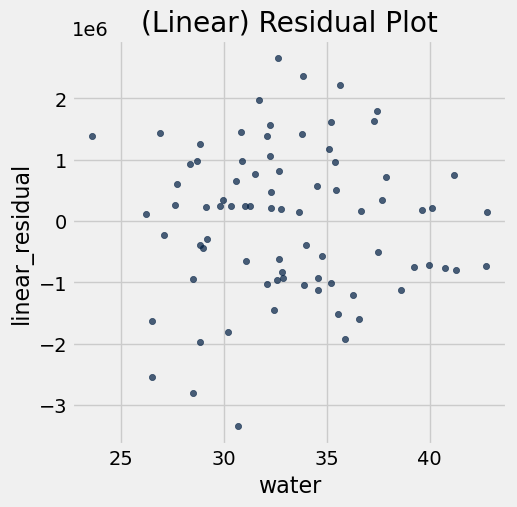

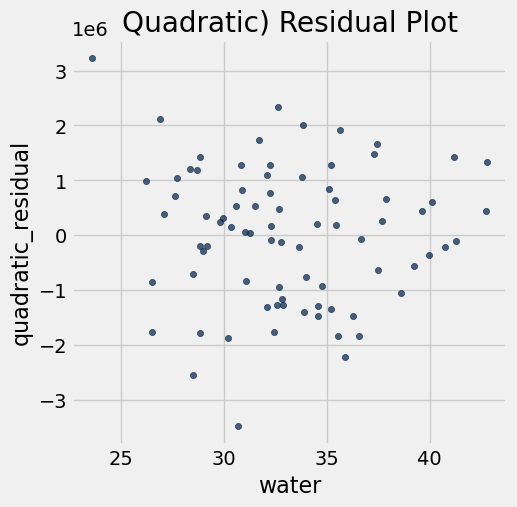

In [94]:
sfo.scatter('water', 'linear_residual')
plt.title('(Linear) Residual Plot')
plt.show()

sfo.scatter('water', 'quadratic_residual')
plt.title('Quadratic) Residual Plot')
plt.show()

<!-- END QUESTION -->

### RMSE

Root mean squared error (Error) is a way to summarize the prediction error for a model. You can decide between two models by choosing the model with the smaller RMSE.

#### Task 09 📍

For this task:
1. Create the function `rmse` that uses the `sfo` table that you've built so far and returns the RMSE associated with the actual electricity values and predicted electricity values based on the model you used. The argument `'predicted_col'` will tell the function which column in `sfo` contains the predicted values you want to use for the calculation.
2. After calculating the RMSE associated with each model, assign 'linear' or 'quadratic' to `best_model_by_RMSE` based on which model has the lowest RMSE. 

In [98]:
def rmse(predicted_col):
    actual = sfo.column('electricity')
    predicted = sfo.column(predicted_col)
    error = actual - predicted
    rmse_value = np.sqrt(np.mean(error ** 2))
    return rmse_value

linear_rmse = rmse('linear_electricity')
quadratic_rmse = rmse('quadratic_electricity')

print(f'The linear RMSE is {linear_rmse}. \nThe quadratic RMSE is {quadratic_rmse}.')

if linear_rmse < quadratic_rmse:
    best_model_by_RMSE = 'linear'
else:
    best_model_by_RMSE = 'quadratic'

print(f'You said the the {best_model_by_RMSE} model is the best model based on the RMSE value.')

The linear RMSE is 1210610.0712136773. 
The quadratic RMSE is 1251437.2141435074.
You said the the linear model is the best model based on the RMSE value.


In [99]:
grader.check("task_09")

task_09 results:
    task_09 - 1 message: ✅ Your linear RMSE seems correct.

    task_09 - 1 result:
        ✅ Test case passed

    task_09 - 2 message: ❌ Your quadratic RMSE doesn't seem correct. Use 'quadratic_electricity' with the rmse function. You might have a bug with your function. Ask for help if you need it.

    task_09 - 2 result:
        ❌ Test case failed
        Trying:
            import hashlib
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(round(quadratic_rmse, 3))
        Expecting:
            '7413ee868029c953ed1d27fb8bb9a674'
        **********************************************************************
        Line 6, in task_09 1
        Failed example:
            get_hash(round(quadratic_rmse, 3))
        Expected:
            '7413ee868029c953ed1d27fb8bb9a674'
        Got:
            'a7141429b7b42295856e6ed3a79c178f'

    task_09 - 3 message: ✅ You choose 'linear' or 'quadratic'.

    task_09 - 3 result:
        ✅ Test case passed

    task_09 - 4 message: ❌ We don't agree with your model choice. Make sure you are picking the model with the smaller RMSE value. 

    task_09 - 4 result:
        ❌ Test case failed
        Trying:
            import hashlib
        Expecting nothing
        ok
        Trying:
            def get_hash(num):
                """Helper function for assessing correctness."""
                return hashlib.md5(str(num).encode()).hexdigest()
        Expecting nothing
        ok
        Trying:
            get_hash(best_model_by_RMSE)
        Expecting:
            'd2ac8798d82192d415e5a4d797dda30a'
        **********************************************************************
        Line 6, in task_09 3
        Failed example:
            get_hash(best_model_by_RMSE)
        Expected:
            'd2ac8798d82192d415e5a4d797dda30a'
        Got:
            '9a932b3cb396238423eb2f33ec17d6aa'

Great work! As you can see, choosing the best model to predict with is not a simple decision. There are many things to consider when picking a model, and the tools you've learned about are here to help you make a decision.

## Submit your Lab to Canvas

Once you have finished working on the lab questions, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the requirements for a Complete score for this lab assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `grader.check_all()`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
4. Select the menu items `File`, `Save and Export Notebook As...`, and `Html_embed` in the notebook's Toolbar to download an HTML version of this notebook file.
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded HTML file.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()